1. Завантаження необхідних бібліотек


In [ ]:
# Встановлення бібліотек, якщо вони ще не встановлені (розкоментуйте при необхідності)
#!pip install pandas re matplotlib seaborn scikit-learn

import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter


# Власний набір стоп-слів для української мови
ukrainian_stopwords = set([
    "я", "ти", "він", "вона", "ми", "ви", "вони", "це", "і", "на", "з", "до", "від", "по", 
    "для", "що", "як", "коли", "де", "не", "вже", "так", "був", "була", "було", "буде", "будуть"
])

2. Завантаження текстів


In [53]:
# Завантажуємо невеликі уривки з творів Лесі Українки та Тараса Шевченка
text_1 = """Стій, серце, стій! не бийся так шалено.
Вгамуйся, думко, не літай так буйно!
Не бий крильми в порожньому просторі."""
text_2 = """Як умру, то поховайте мене на могилі.
Серед степу широкого, на Вкраїні милій.
Щоб лани широкополі, і Дніпро, і кручі,
Було видно, було чути, як реве ревучий."""

3. Перетворення текстів у формат DataFrame


In [54]:
df = pd.DataFrame({"author": ["Леся Українка"]*3 + ["Тарас Шевченко"]*4, 
                   "text": text_1.split("\n") + text_2.split("\n")})
df


,author,text
0,Леся Українка,"Стій, серце, стій! не бийся так шалено."
1,Леся Українка,"Вгамуйся, думко, не літай так буйно!"
2,Леся Українка,Не бий крильми в порожньому просторі.
3,Тарас Шевченко,"Як умру, то поховайте мене на могилі."
4,Тарас Шевченко,"Серед степу широкого, на Вкраїні милій."
5,Тарас Шевченко,"Щоб лани широкополі, і Дніпро, і кручі,"
6,Тарас Шевченко,"Було видно, було чути, як реве ревучий."


4. Токенізація тексту


In [59]:
# Простий метод токенізації з використанням регулярних виразів
def tokenize(text):
    # Перетворюємо текст в нижній регістр
    text = text.lower()
    # Використовуємо регулярний вираз для розбиття тексту на слова
    tokens = re.findall(r'\b\w+\b', text)  # Витягнення слів (не враховує розділові знаки)
    # Видаляємо стоп-слова
    tokens = [word for word in tokens if word not in ukrainian_stopwords]
    return tokens

# Токенізація тексту
df["tokens"] = df["text"].apply(lambda x: tokenize(x))

# Якщо є порожні значення, заміняємо їх на порожні списки
df["tokens"] = df["tokens"].apply(lambda x: [] if x is None else x)

# Використовуємо explode для розгортання списку токенів
df_exploded = df.explode("tokens").reset_index(drop=True)

# Переглянути результат
df_exploded

,author,text,tokens
0,Леся Українка,"Стій, серце, стій! не бийся так шалено.",стій
1,Леся Українка,"Стій, серце, стій! не бийся так шалено.",серце
2,Леся Українка,"Стій, серце, стій! не бийся так шалено.",стій
3,Леся Українка,"Стій, серце, стій! не бийся так шалено.",бийся
4,Леся Українка,"Стій, серце, стій! не бийся так шалено.",шалено
5,Леся Українка,"Вгамуйся, думко, не літай так буйно!",вгамуйся
6,Леся Українка,"Вгамуйся, думко, не літай так буйно!",думко
7,Леся Українка,"Вгамуйся, думко, не літай так буйно!",літай
8,Леся Українка,"Вгамуйся, думко, не літай так буйно!",буйно
9,Леся Українка,Не бий крильми в порожньому просторі.,бий


In [60]:
# Перевірка на те, що після tokenization кожен елемент є списком
df["tokens"] = df["text"].apply(lambda x: tokenize(x) if isinstance(tokenize(x), list) else [])

# Якщо є порожні значення, заміняємо їх на порожні списки
df["tokens"] = df["tokens"].apply(lambda x: [] if x is None else x)

# Використовуємо explode
df_exploded = df.explode("tokens").reset_index(drop=True)


5. Підрахунок частоти вживання слів


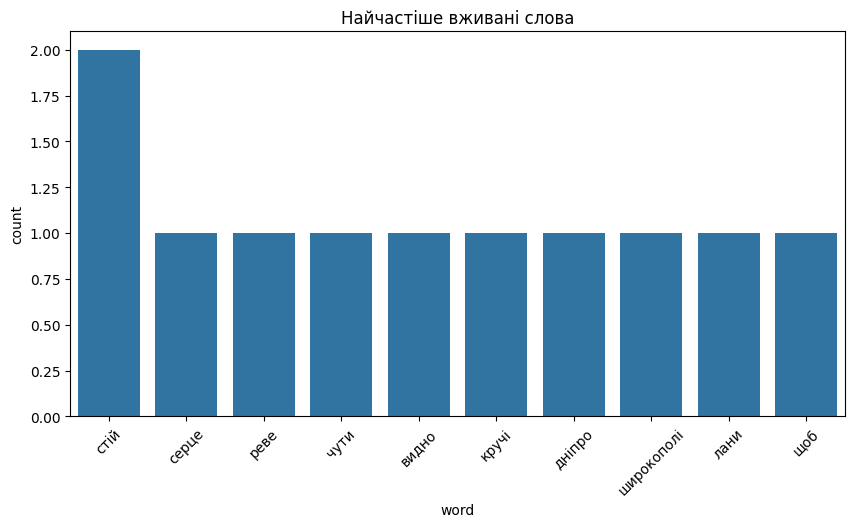

In [61]:
# Об'єднуємо всі токени в один список
all_tokens = [token for sublist in df["tokens"] for token in sublist]

# Рахуємо частоту появи кожного слова
word_freq = Counter(all_tokens)

# Створюємо DataFrame для візуалізації
word_freq_df = pd.DataFrame(word_freq.items(), columns=["word", "count"]).sort_values(by="count", ascending=False)

# Побудова діаграми
plt.figure(figsize=(10, 5))
sns.barplot(x=word_freq_df["word"][:10], y=word_freq_df["count"][:10])
plt.xticks(rotation=45)
plt.title("Найчастіше вживані слова")
plt.show()

6. Обчислення Term Frequency (TF)


In [62]:
def term_frequency(text):
    words = tokenize(text)
    word_count = Counter(words)
    max_freq = max(word_count.values()) if word_count else 1  # Захист від ділення на нуль
    return {word: freq / max_freq for word, freq in word_count.items()}

df["tf"] = df["text"].apply(term_frequency)
df


,author,text,tokens,tf
0,Леся Українка,"Стій, серце, стій! не бийся так шалено.","[стій, серце, стій, бийся, шалено]","{'стій': 1.0, 'серце': 0.5, 'бийся': 0.5, 'шал..."
1,Леся Українка,"Вгамуйся, думко, не літай так буйно!","[вгамуйся, думко, літай, буйно]","{'вгамуйся': 1.0, 'думко': 1.0, 'літай': 1.0, ..."
2,Леся Українка,Не бий крильми в порожньому просторі.,"[бий, крильми, в, порожньому, просторі]","{'бий': 1.0, 'крильми': 1.0, 'в': 1.0, 'порожн..."
3,Тарас Шевченко,"Як умру, то поховайте мене на могилі.","[умру, то, поховайте, мене, могилі]","{'умру': 1.0, 'то': 1.0, 'поховайте': 1.0, 'ме..."
4,Тарас Шевченко,"Серед степу широкого, на Вкраїні милій.","[серед, степу, широкого, вкраїні, милій]","{'серед': 1.0, 'степу': 1.0, 'широкого': 1.0, ..."
5,Тарас Шевченко,"Щоб лани широкополі, і Дніпро, і кручі,","[щоб, лани, широкополі, дніпро, кручі]","{'щоб': 1.0, 'лани': 1.0, 'широкополі': 1.0, '..."
6,Тарас Шевченко,"Було видно, було чути, як реве ревучий.","[видно, чути, реве, ревучий]","{'видно': 1.0, 'чути': 1.0, 'реве': 1.0, 'реву..."


7. Функція для розрахунку подібності Жаккара


In [63]:
def jaccard_similarity(text1, text2):
    set1, set2 = set(tokenize(text1)), set(tokenize(text2))
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

similarity = jaccard_similarity(text_1, text_2)
print(f"Подібність Жаккара між текстами: {similarity:.2f}")

Подібність Жаккара між текстами: 0.00


8. Косинусна подібність


In [64]:
vectorizer = CountVectorizer().fit([text_1, text_2])
vectors = vectorizer.transform([text_1, text_2])

from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(vectors)[0, 1]

print(f"Косинусна подібність між текстами: {cos_sim:.2f}")

Косинусна подібність між текстами: 0.00
